In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel("machineLearning_excel.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          923 non-null    int64  
 1   Mileage       923 non-null    int64  
 2   Rating        923 non-null    float64
 3   Review_Count  923 non-null    int64  
 4   Price         923 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 36.2 KB


In [4]:
df.head()

,Name,Mileage,Rating,Review_Count,Price
0,6,1877,4.7,2635,148994
1,7,2422,4.6,1220,73999
2,6,455,4.6,1220,205999
3,8,1150,4.2,342,92985
4,5,31413,4.2,2811,133333


In [5]:
df.shape

(923, 5)

In [6]:
print(df.dtypes)

Name              int64
Mileage           int64
Rating          float64
Review_Count      int64
Price             int64
dtype: object


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Name,923.0,5.035753,1.534781,0.0,4.0,5.0,6.0,8.0
Mileage,923.0,24055.700975,29656.787017,108.0,8633.5,21899.0,34979.5,765399.0
Rating,923.0,4.534670,0.394857,2.5,4.4,4.6,4.8,5.0
Review_Count,923.0,1341.497291,1243.868494,44.0,473.5,1003.0,1796.0,6984.0
Price,923.0,61567.033586,32844.411144,21598.0,40886.0,52898.0,71980.5,234993.0


In [8]:
df.isna().sum() # Eksik verileri bulma

Name            0
Mileage         0
Rating          0
Review_Count    0
Price           0
dtype: int64

In [9]:
df.Name.value_counts()

Name
4    254
7    197
5    182
6    151
3     81
2     28
8     16
1     10
0      4
Name: count, dtype: int64

In [10]:
df.Mileage.value_counts()

Mileage
39285    3
1877     2
7671     2
46879    2
16273    2
        ..
2268     1
21769    1
9403     1
307      1
3485     1
Name: count, Length: 900, dtype: int64

In [11]:
df.Rating.value_counts()

Rating
4.6    160
4.8    159
4.7    128
4.9    120
4.5     80
4.4     47
4.3     39
4.2     38
4.0     34
5.0     30
3.4     17
3.9     14
3.7     13
4.1     11
3.8     10
3.1      8
3.2      4
3.5      4
3.6      3
2.7      3
2.5      1
Name: count, dtype: int64

<Axes: ylabel='Rating'>

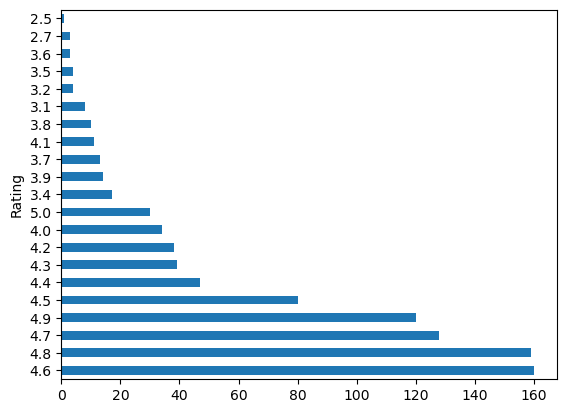

In [12]:
df.Rating.value_counts().plot.barh()

In [13]:
df.Review_Count.value_counts()

Review_Count
1220    30
1447    22
109     20
747     18
1347    18
        ..
977      1
376      1
261      1
1686     1
52       1
Name: count, Length: 181, dtype: int64

In [14]:
df.Price.value_counts()

Price
52000     4
31995     3
54994     3
74999     3
53900     3
         ..
67007     1
138880    1
53250     1
74788     1
68777     1
Name: count, Length: 832, dtype: int64

In [15]:
df.Price.describe()

count       923.000000
mean      61567.033586
std       32844.411144
min       21598.000000
25%       40886.000000
50%       52898.000000
75%       71980.500000
max      234993.000000
Name: Price, dtype: float64

C:\Users\elift\AppData\Local\Temp\ipykernel_12628\3085005458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=40)


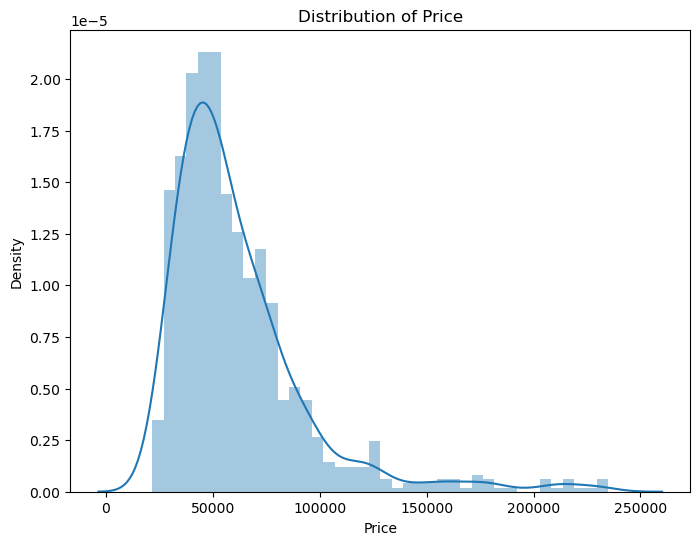

In [16]:
def single_distplot(column):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.distplot(df[column], bins=40)
    plt.title(f'Distribution of {column}')
    plt.show()

single_distplot('Price')

C:\Users\elift\AppData\Local\Temp\ipykernel_12628\3777565164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], bins=40)


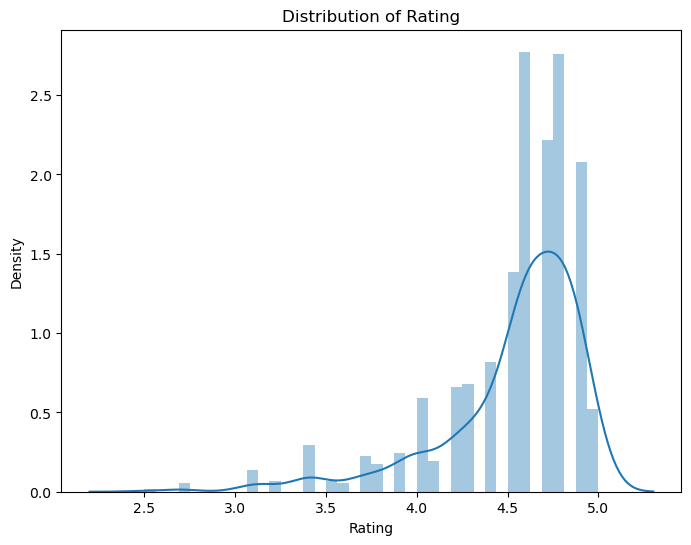

In [17]:
def single_distplot(column):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.distplot(df[column], bins=40)
    plt.title(f'Distribution of {column}')
    plt.show()

single_distplot('Rating')

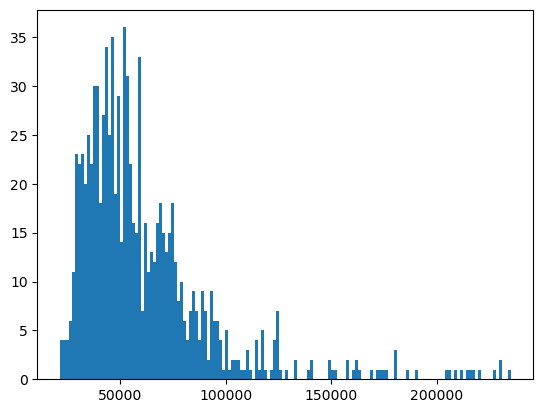

In [18]:
# ?????????????????????????????????????
plt.figure()
plt.hist(df['Price'], bins=150)
plt.show()

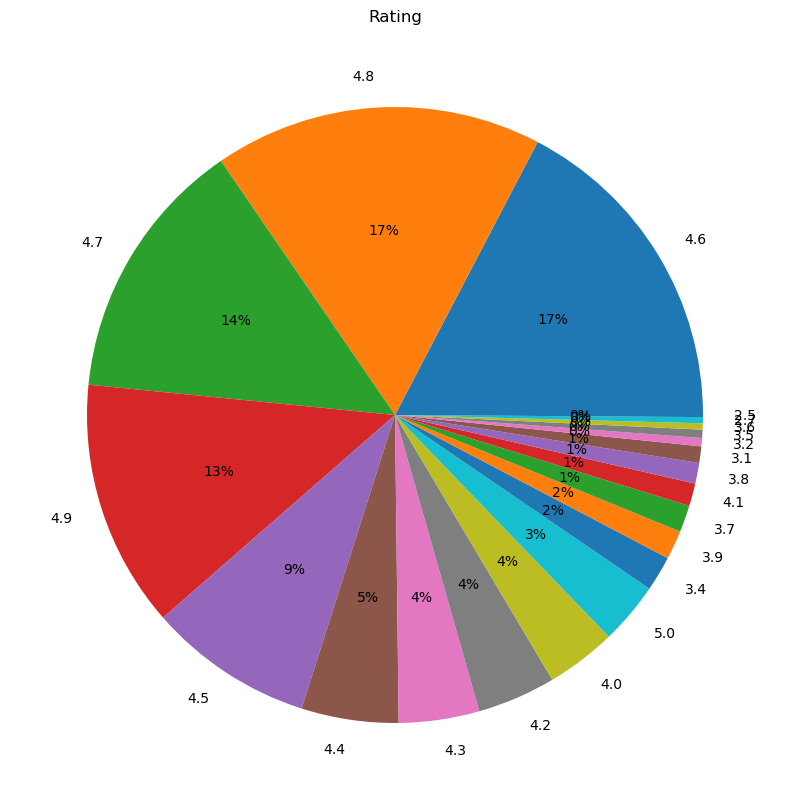

In [19]:
fig = plt.figure(figsize=(30, 10))
df['Rating'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.ylabel("", fontsize=5)
plt.title("Rating")
plt.show()

In [20]:
df.dropna(axis=0, inplace=True)
print(df.isna().sum())

Name            0
Mileage         0
Rating          0
Review_Count    0
Price           0
dtype: int64


<Axes: >

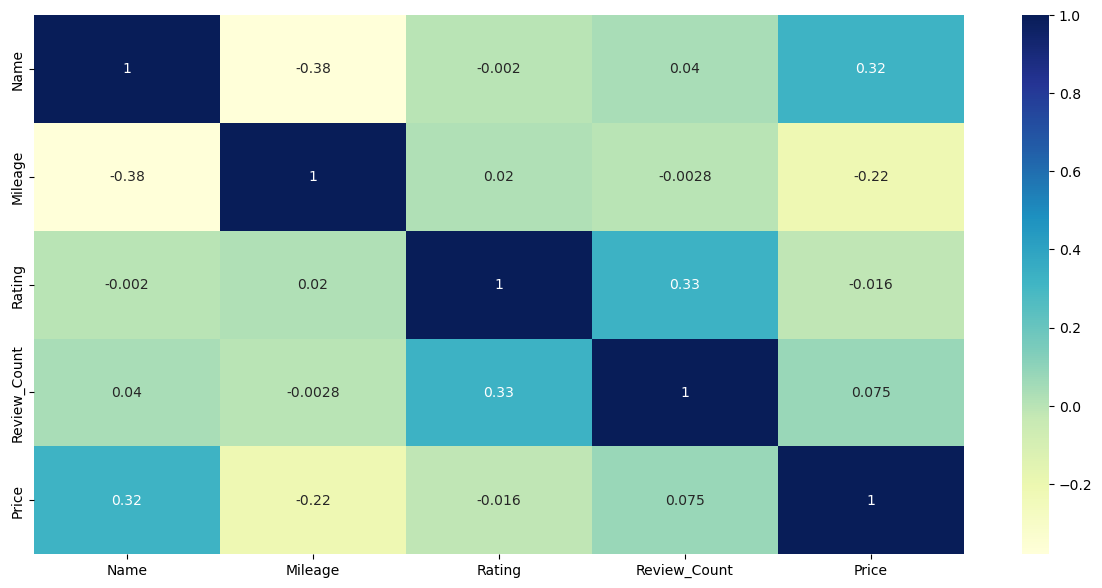

In [21]:
plt.figure(figsize=(15,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [22]:
# median_house_value (fiyat) a etki eden öznitelikleri görelim
corr_matrix['Price'].sort_values(ascending=False)

Price           1.000000
Name            0.322224
Review_Count    0.074807
Rating         -0.016306
Mileage        -0.217988
Name: Price, dtype: float64

In [23]:
df.to_excel('machineLearning_excel.xlsx', index=False)

In [24]:
# Convert 'Name' column to strings
df['Name'] = df['Name'].astype(str)

# Update the 'Name' column
df['Name'] = df['Name'].str[:13]

# Convert 'Review_Count' to string and replace commas
df['Review_Count'] = df['Review_Count'].astype(str).str.replace(',', '')


In [25]:
df.to_excel('machineLearning_excel.xlsx', index=False)

In [26]:
labelEncoder = LabelEncoder()
print(df["Name"].value_counts())
df["Name"] = labelEncoder.fit_transform(df["Name"])
print(df["Name"].value_counts())
df.describe()

Name
4    254
7    197
5    182
6    151
3     81
2     28
8     16
1     10
0      4
Name: count, dtype: int64
Name
4    254
7    197
5    182
6    151
3     81
2     28
8     16
1     10
0      4
Name: count, dtype: int64


,Name,Mileage,Rating,Price
count,923.000000,923.000000,923.000000,923.000000
mean,5.035753,24055.700975,4.534670,61567.033586
std,1.534781,29656.787017,0.394857,32844.411144
min,0.000000,108.000000,2.500000,21598.000000
25%,4.000000,8633.500000,4.400000,40886.000000
50%,5.000000,21899.000000,4.600000,52898.000000
75%,6.000000,34979.500000,4.800000,71980.500000
max,8.000000,765399.000000,5.000000,234993.000000


In [27]:
df.to_excel('machineLearning_excel.xlsx', index=False)